<h1> Sana Shaikh - HW4 P2 - Fashion Image Recognition using Deep Convolutional Neural Networks </h1>

In [1]:
import numpy as np
np.random.seed(0)

In [2]:
import tensorflow as tf
from tensorflow import keras

# "Sequential" model lets us to define a stack of neural network layers
from keras.models import Sequential

# import the "core" layers:
from keras.layers import Dense, Dropout, Activation, Flatten

# CNN
from keras.layers import Convolution2D, MaxPooling2D

# import some utilities to transform our data
from keras.utils import np_utils

from tensorflow.keras import layers

#### Let's use the Fashion-MNIST Dataset including 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images:

0:	T-shirt/top, 
1:	Trouser,
2:	Pullover,
3:	Dress,
4:	Coat,
5:	Sandal,
6:	Shirt,
7:	Sneaker,
8:	Bag,
9:	Ankle boot

In [3]:
# Keras will download MNIST dataset for us:
from keras.datasets import fashion_mnist
 
# By default, the first 60k of MNIST has been defined as training and the rest as testing set: 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


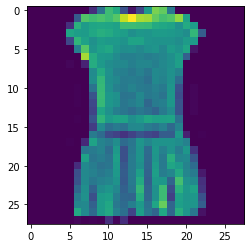

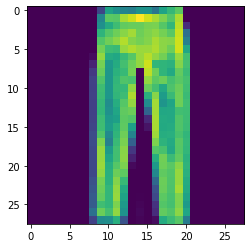

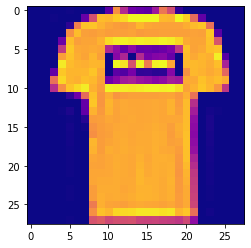

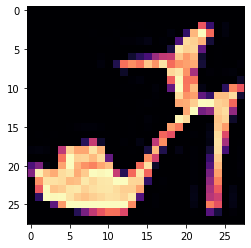

In [5]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

imgplot = plt.imshow(X_train[3,:,:],cmap='viridis')
plt.show()
imgplot = plt.imshow(X_train[16,:,:],cmap='viridis')
plt.show()
imgplot = plt.imshow(X_train[1,:,:],cmap='plasma')
plt.show()
imgplot = plt.imshow(X_train[9,:,:],cmap='magma')
plt.show()


In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [7]:
# simply normalize the features to the range of [0,1]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
# output label: 
print (y_train.shape)
print (y_train[:10]) #prints labels for the first 10 samples of the training data

(60000,)
[9 0 0 3 0 2 7 2 5 5]


In [9]:
# OneHotEncoding for the output label:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [10]:
# Label after OneHotEncoding:
print (y_train.shape)
print (y_train[:10])

(60000, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


### Define the Network Architecture (model):

In [11]:
# Declare Sequential model for our network:
model = Sequential()

In [12]:
# CNN first layer (with 32 3x3 filter):
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1), padding="same"))
print(model.output_shape) # with no zero padding -> (None, 26, 26, 32);

(None, 28, 28, 32)


In [13]:
# more hidden layers:
model.add(Convolution2D(32, (3, 3), activation='relu', padding="same"))
print(model.output_shape)

# Pooling Layer:
model.add(MaxPooling2D(pool_size=(2,2)))
print(model.output_shape)

(None, 28, 28, 32)
(None, 14, 14, 32)


In [14]:
# more hidden layers:
model.add(Convolution2D(32, (3, 3), activation='relu', padding="same"))
print(model.output_shape)

# Pooling Layer:
model.add(MaxPooling2D(pool_size=(2,2)))
print(model.output_shape)

# Dropout layer to avoid overfitting
model.add(Dropout(0.30)) #tried changing this to 0.20 but accuracy went down, so increased to 0.30

(None, 14, 14, 32)
(None, 7, 7, 32)


In [15]:
# output Fully connected Dense layers:
model.add(Flatten())
print(model.output_shape)

model.add(Dense(128, activation='relu'))
print(model.output_shape)

model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
print(model.output_shape)

(None, 1568)
(None, 128)
(None, 10)


## Compile the model:
#### We need to compile the model and then it will be ready to train it:

In [16]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],
              optimizer='adam')
# more info about loss functions: https://keras.io/losses
# more infor about Optimizers: https://keras.io/optimizers

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

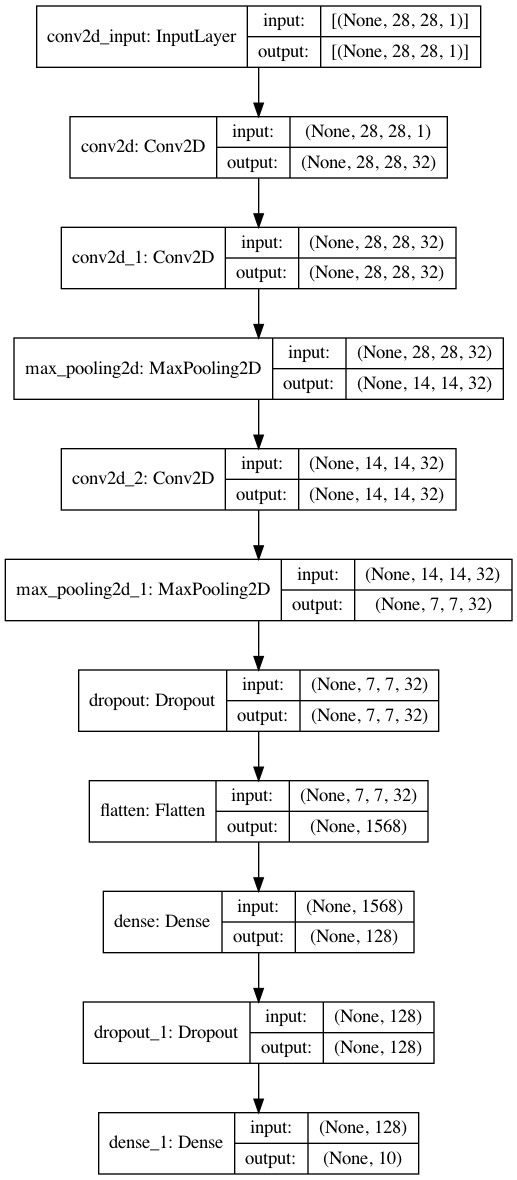

In [17]:
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, show_shapes=True)

In [18]:
# 320 = (3x3+1)x32 filters
# 9248 = (3x3x32+1)x32 filters
# 802944 = (6272+1)x128
# 1290 = (128+1)x10

## Training:

In [19]:
history = model.fit(X_train, y_train, batch_size=64, epochs=12, verbose=1)
#history = model.fit(X_train, y_train, validation_split=0.20, batch_size=200, epochs=12, verbose=1)   

Epoch 1/12
938/938 [==============================] - 61s 65ms/step - loss: 0.7878 - accuracy: 0.7144
Epoch 2/12
938/938 [==============================] - 62s 66ms/step - loss: 0.3781 - accuracy: 0.8646
Epoch 3/12
938/938 [==============================] - 62s 66ms/step - loss: 0.3131 - accuracy: 0.8888
Epoch 4/12
938/938 [==============================] - 60s 64ms/step - loss: 0.2786 - accuracy: 0.8985
Epoch 5/12
938/938 [==============================] - 61s 65ms/step - loss: 0.2577 - accuracy: 0.9053
Epoch 6/12
938/938 [==============================] - 63s 68ms/step - loss: 0.2389 - accuracy: 0.9144
Epoch 7/12
938/938 [==============================] - 63s 67ms/step - loss: 0.2311 - accuracy: 0.9157
Epoch 8/12
938/938 [==============================] - 62s 66ms/step - loss: 0.2178 - accuracy: 0.9202
Epoch 9/12
938/938 [==============================] - 59s 63ms/step - loss: 0.2142 - accuracy: 0.9219
Epoch 10/12
938/938 [==============================] - 61s 65ms/step - loss: 0.204

In [20]:
# Training with callbacks:
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, min_delta=0)
# fitted_model = model.fit(X_train, y_train, validation_split=0.25, 
#                       batch_size=32, epochs=5, callbacks=[callback], verbose=1)

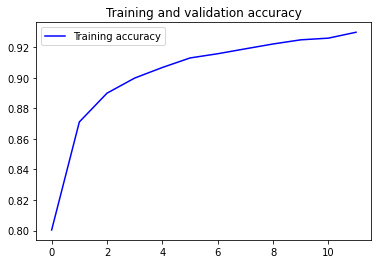

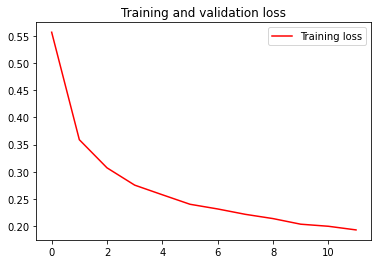

In [21]:
import matplotlib.pyplot as plt

%matplotlib inline

accuracy = history.history['accuracy']
#val_accuracy = history.history['val_accuracy'] #
loss = history.history['loss']
#val_loss = history.history['val_loss'] #
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b-', label='Training accuracy')
#plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy') #
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r-', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss') #
plt.title('Training and validation loss')
plt.legend()
#plt.show() #

## Testing:

In [22]:
predicted_classes = model.predict(X_test)

In [23]:
# Testing:
score = model.evaluate(X_test, y_test, verbose=1)
print('The accuracy is: ', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.1999 - accuracy: 0.9259
The accuracy is:  0.9258999824523926


I tested the code with the following different changes: 
- with 1 hidden layer, dropout of 25%, and 10 epochs, accuracy is: 92.61%
- with 1 hidden layer, dropout of 25%, and 15 epochs, accuracy is: 92.86%
- with 1 hidden layer, dropout of 30%, and 10 epochs, accuracy is: 92.48%
- with 2 hidden layers, dropout of 30%, and 10 epochs, accuracy is: 92.79%
- with 2 hidden layers, dropout of 25%, and 15 epochs, accuracy is: 92.59%
----------------------------------------------------------------------------------------------------
- with 2 hidden layers, dropout of 30%, and 15 epochs, accuracy is: 93% -- Finally!

I wanted to get a higher accuracy score than 93%, so I decided to play around with different optimization functions while keeping the same parameters that provided the highest accuracy score from the above list.

- Adam - with 2 hidden layers, dropout of 30%, and 5 epochs, accuracy is: 91.9%
- Adagrad: with 2 hidden layers, dropout of 30%, and 5 epochs, accuracy is: 73.25%
- Adadelta: with 2 hidden layers, dropout of 30%, and 5 epochs, accuracy is: 56.32%
- Adamax: with 2 hidden layers, dropout of 30%, and 5 epochs, accuracy is: 88.6%


Now testing with higher number of epochs using the optimizers that gave the highest results in the above list:
- Adam: with 2 hidden layers, dropout of 30%, and 15 epochs, accuracy is: 92.9%
- Adamax: with 2 hidden layers, dropout of 30%, and 15 epochs, accuracy is: 91.97%
----------------------------------------------------------------------------------------------------
- Adam: with 2 hidden layers, dropout of 30%, 25% validation_split, and 15 epochs, accuracy is: 92.8%
- Adamax: with 2 hidden layers, dropout of 30%, 25% validation_split, and 15 epochs, accuracy is: 91.9%

----------------------------------------------------------------------------------------------------
- Adam: with 2 hidden layers, dropout of 30%, 25% validation_split, batch 100, and 15 epochs, accuracy is: 92.05%
- Adam: with 2 hidden layers, dropout of 30%, 20% validation_split, batch 32, and 15 epochs, accuracy is: 92.59%
- Adam: with 2 hidden layers, dropout of 30%, 20% validation_split, batch 200, and 12 epochs, accuracy is: 91.92%

----------------------------------------------------------------------------------------------------
Trying one more time with the same parameters that gave me a 93% accuracy score because I give up:
- with 2 hidden layers, dropout of 30%, and 15 epochs, accuracy is: 

